In [16]:
%matplotlib inline
%matplotlib notebook

In [17]:
import GPUtil
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stats = []
def query():
    global stats
    gpus = GPUtil.getGPUs()
    if len(stats) == 0:
        stats = [{k: [v] for k, v in gpu.__dict__.items()} for gpu in gpus]
    else:
        for i, gpu in enumerate(gpus):
            for k, v in gpu.__dict__.items():
                stats[i][k].append(v)


In [3]:
stats = []
x = []
interval = 0.2
for i in range(100):
    start = time.time()
    x.append(start)
    query()
    end = time.time()
    if end - start < interval:
        time.sleep(interval - end + start)

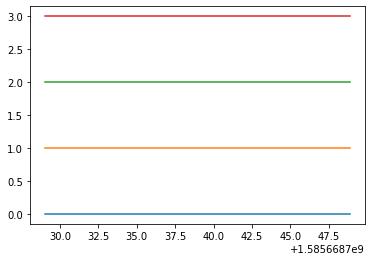

In [13]:
for i, stat in enumerate(stats):
    plt.plot(x, np.array(stat["load"]) + i, label="GPU{}".format(stat["id"][0]))
plt.show()


In [19]:
plt.ion()
gpus = GPUtil.getGPUs()
lines = {gpu.id: plt.plot([], [], label="GPU{}".format(gpu.id))[0] for gpu in gpus}
plt.show()
for k, curx in enumerate(x):
    for i, stat in enumerate(stats):
        line = lines[stat["id"][k]]
        line.set_xdata(np.append(line.get_xdata(), curx))
        line.set_ydata(np.append(line.get_ydata(), stat["load"][k] + i))
    plt.draw()


<IPython.core.display.Javascript object>